# Multi-Layer Perceptron for classification




## Objective:
We want to implement a two layers Multi-Layer Perceptron (MLP) with 1 hidden layer in Python, for a classification problem.

The output of the network is simply the output of several cascaded functions :
- Linear transformations. We note the weights of a linear transformation with $W$
- Additive biases. We note the parameters of additive biases  with $b$
- Non-linearities.

For this, we will implement:
- the forward propagation
- the computation of the cost/loss
- the backward propagation (to obtain the gradients)
- the update of the parameters

Furthermore, we define the following sizes :

- $n^{[0]}$ : number of input neurons
- $n^{[1]}$ : number of neurons in hidden layer
- $n^{[2]}$ : number of neurons in output layer
- $m$ : number of training datapoints

### Cost function 

The **cost** is the average of the the **loss** over the training data. Since we are dealing with a binary classification problem, we will use the binary cross-entropy.

$\mathcal{L} = - \left( y \log(\hat{y}) + (1-y) \log(1-\hat{y}) \right),$

where 
- the $y$ are the ground-truth labels of the data and 
- the $\hat{y}$ the estimated labels (outputs of the network).

### Forward propagation

- $\large \underbr{Z^{[1]}}{(m,n^{[1]})} = \underbr{X}{(m,n^{[0]})} \underbr{W^{[1]}}{(n^{[0]},n^{[1]})}  + \underbr{b^{[1]}}{n^{(1)}} $
- $\large \underbr{A^{[1]}}{(m,n^{[1]})} = f(Z^{[1]})$
- $\large \underbr{Z^{[2]}}{(m,n^{[2]})} = \underbr{A^{[1]}}{(m,n^{[1]})} \underbr{W^{[2]}}{(n^{[1]},n^{[2]})}  + \underbr{b^{[2]}}{n^{(2)}}$
- $\large \underbr{A^{[2]}}{(m,n^{[2]})} = \sigma(Z^{[2]})$

where 
- $f$ is a ```Relu``` function (the code is provided)
- $\sigma$ is a sigmoid function (the code is provided)

### Backward propagation

The backward propagation can be calculated as

- $\large \underbr{dZ^{[2]}}{(m,n^{[2]})} = \underbr{A^{[2]}}{(m,n^{[2]})} - \underbr{Y}{(m,n^{[2]})}$
- $\large \underbr{dW^{[2]}}{(n^{[1]},n^{[2]})} = \frac{1}{m} {\underbr{A^{[1]}}{(m,n^{[1]})}}^{T} \underbr{dZ^{[2]}}{(m,n^{[2]})} $
- $\large \underbr{db^{[2]}}{(n^{[2]})} = \frac{1}{m} \sum_{i=1}^{m} \underbr{dZ^{[2]}}{(m,n^{[2]})}$

- $\large \underbr{dA^{[1]}}{(m,n^{[1]})} = \underbr{dZ^{[2]}}{(m,n^{[2]})} {\underbr{W^{[2]}}{(n^{[1]},n^{[2]})}}^{T} $
- $\large \underbr{dZ^{[1]}}{(m,n^{[1]})} = \underbr{dA^{[1]}}{(m,n^{[1]})} \: \odot \: f' (\underbr{Z^{[1]}}{(m,n^{[1]})})$
- $\large \underbr{dW^{[1]}}{(n^{[0]},n^{[1]})} = \frac{1}{m} {\underbr{X}{(m,n^{[0]})}}^{T} \underbr{dZ^{[1]}}{(m,n^{[1]})} $
- $\large \underbr{db^{[1]}}{(n^{[1]})} = \frac{1}{m} \sum_{i=1}^{m} \underbr{dZ^{[1]}}{(m,n^{[1]})}$


### Backward propagation

Based on the previous formulae, write the corresponding backpropagation algorithm.

### Parameters update

- Implement a **first version** in which the parameters are updated using a **simple gradient descent**:
    - $W = W - \alpha dW$


- Implement a **second version** in which the parameters are updated using the **momentum method**:
    - $V_{dW}(t) = \beta V_{dW}(t-1) + (1-\beta) dW$
    - $W(t) = W(t-1) - \alpha V_{dW}(t)$

### IMPORTANT IMPLEMENTATION INFORMATION !

The $\odot$ operator refers to the point-wise multiplication operation. The matrix multiplication operation can be carried out in Python using ```np.dot(.,.)``` function.





# Load packages

In [0]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn import model_selection

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn



# Define a set of functions

In [0]:
def F_standardize(X):
  
    X -= np.mean(X, axis=0, keepdims=True) 
    X /= (np.std(X, axis=0, keepdims=True) + 1e-16)
    return X

In [0]:
def F_sigmoid(x):
   
    return 1 / (1 + np.exp(-x))

def F_relu(x):
   
    return x * (x > 0)

def F_dRelu(x):
    
    x[x<=0] = 0
    x[x>0] = 1
    return x

def F_computeCost(hat_y, y):
   
    m = y.shape[0]
     
    loss =  -(np.multiply(y,np.log(hat_y))+np.multiply(1-y,np.log(1-hat_y)))
       

    cost = np.sum(loss) / m
    return cost

def F_computeAccuracy(hat_y, y):
   
    
    m = y.shape[0]    
    class_y = np.copy(hat_y)
    class_y[class_y>=0.5]=1
    class_y[class_y<0.5]=0
    return np.sum(class_y==y) / m

# Load dataset and pre-process it

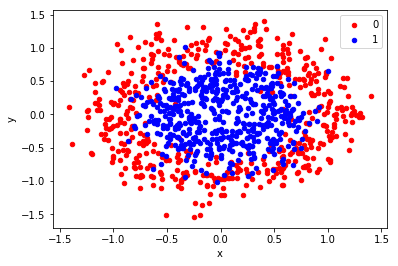

In [0]:
X, y = datasets.make_circles(n_samples=1000, noise=0.2, factor=0.5)

from pandas import DataFrame

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [0]:
print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
print(set(y))




X = F_standardize(X)

# --- Split between training set and test set
# --- (m, n_0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# --- Convert to proper shape: (m,) -> (m, 1)
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

# --- Convert to oneHotEncoding: (nbExamples, 1) -> (nbExamples, nbClass)
n_0 = X_train.shape[1]
n_2 = 1

print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))
print("n_0=n_in: {} n_2=n_out: {}".format(n_0, n_2))

X.shape: (1000, 2)
y.shape: (1000,)
{0, 1}
X_train.shape: (800, 2)
X_test.shape: (200, 2)
y_train.shape: (800, 1)
y_test.shape: (200, 1)
y_train.shape: (800, 1)
y_test.shape: (200, 1)
n_0=n_in: 2 n_2=n_out: 1


# Define the MLP class with forward, backward and update methods

In [0]:
class C_MultiLayerPerceptron:
  

    W1, b1, W2, b2 = [], [], [], []
    A0, Z1, A1, Z2, A2 = [], [], [], [], []
    dW1, db1, dW2, db2 = [], [], [], []   
    dZ1, dA1, dZ2 = [], [], []

    VdW1, Vdb1, VdW2, Vdb2 = [], [], [], []     
    
    def __init__(self, n_0, n_1, n_2):
        self.W1 = np.random.randn(n_0, n_1) * 0.01
        self.b1 = np.zeros(shape=(1, n_1))
        self.W2 = np.random.randn(n_1, n_2) * 0.01
        self.b2 = np.zeros(shape=(1, n_2))        
  
        self.VdW1 = np.zeros(shape=(n_0, n_1)) 
        self.Vdb1 = np.zeros(shape=(1, n_1))
        self.VdW2 = np.zeros(shape=(n_1, n_2))
        self.Vdb2 = np.zeros(shape=(1, n_2))
        return

    
    def __setattr__(self, attrName, val):
        if hasattr(self, attrName):
            self.__dict__[attrName] = val
        else:
            raise Exception("self.%s note part of the fields" % attrName)

            

    def M_forwardPropagation(self, X):
       
        
        
        self.A0 = X
        self.Z1 = np.dot(self.A0,self.W1)+self.b1            
        self.A1 = F_relu(self.Z1)          
        self.Z2 =  np.dot(self.A1,self.W2)+self.b2        
        self.A2 = F_sigmoid(self.Z2)          
        hat_y = self.A2
            
        
        return hat_y


    def M_backwardPropagation(self, X, y):
     
        
        m = y.shape[0]
        
        self.dZ2 = self.A2 - y
        self.dW2 = (1/m)* np.dot(np.transpose(self.A1),self.dZ2)
        self.db2 = np.mean(self.dZ2,axis=0)
        self.dA1 =  np.dot(self.dZ2,np.transpose(self.W2))
        self.dZ1 = np.multiply (self.dA1,F_dRelu(self.Z1))
        self.dW1 = (1/m)* np.dot(np.transpose(self.A0),self.dZ1)
        self.db1 = np.mean(self.dZ1,axis=0)
           

        return

    
    def M_gradientDescent(self, alpha):
     
        
        self.W1 = self.W1-(alpha*self.dW1)
        self.b1 = self.b1-(alpha*self.db1)
        self.W2 = self.W2-(alpha*self.dW2)
        self.b2 = self.b2-(alpha*self.db2)
            
            
        return

    
    def M_momentum(self, alpha, beta):
       
        
        self.VdW1 = (beta*self.VdW1)+((1-beta)*self.dW1)
        self.W1 = self.W1-(alpha*self.VdW1)

        self.Vdb1 = (beta*self.Vdb1)+((1-beta)*self.db1)
        self.b1 = self.b1-(alpha*self.Vdb1)

        self.VdW2 = (beta*self.VdW2)+(1-beta)*self.dW2
        self.W2 = self.W2-(alpha*self.VdW2)

        self.Vdb2 = (beta*self.Vdb2)+(1-beta)*self.db2
        self.b2 = self.b2-(alpha*self.Vdb2)
          
        return

# Perform training using batch-gradiant and epochs

In [0]:
def Train(Momentum = False):
  # hyper-parameters
  n_1 = 10 # number of hidden neurons
  nb_epoch = 5000 # number of epochs (number of iterations over full training set)
  alpha=0.1 # learning rate
  beta=0.9 # beat parameters for momentum


  # Instantiate the class MLP with providing 
  # the size of the various layers (n_0=n_input, n_1=n_hidden, n_2=n_output) 
  myMLP = C_MultiLayerPerceptron(n_0, n_1, n_2)

  train_cost, train_accuracy, test_cost, test_accuracy = [], [], [], []

  # Run over epochs
  for num_epoch in range(0, nb_epoch):

      # --- Forward
      hat_y_train = myMLP.M_forwardPropagation(X_train)

      # --- Store results on train
      train_cost.append( F_computeCost(hat_y_train, y_train) )
      train_accuracy.append( F_computeAccuracy(hat_y_train, y_train) )

      # --- Backward
      myMLP.M_backwardPropagation(X_train, y_train)

      # --- Update
      
      if(Momentum == True) :
        myMLP.M_momentum(alpha, beta)
      else :
        myMLP.M_gradientDescent(alpha)

      # --- Store results on test
      hat_y_test = myMLP.M_forwardPropagation(X_test)
      test_cost.append( F_computeCost(hat_y_test, y_test) )    
      test_accuracy.append( F_computeAccuracy(hat_y_test, y_test) )

      if (num_epoch % 500)==0: 
          print("epoch: {0:d} (cost: train {1:.2f} test {2:.2f}) (accuracy: train {3:.2f} test {4:.2f})".format(num_epoch, train_cost[-1], test_cost[-1], train_accuracy[-1], test_accuracy[-1]))
  return train_cost, train_accuracy, test_cost, test_accuracy,myMLP.M_forwardPropagation(X).round().reshape(-1)

# Train The Model With Updating Parameter  By Gradient Descent

In [0]:
train_cost, train_accuracy, test_cost, test_accuracy,pred=Train(Momentum=False)

epoch: 0 (cost: train 0.69 test 0.69) (accuracy: train 0.50 test 0.44)
epoch: 500 (cost: train 0.65 test 0.67) (accuracy: train 0.65 test 0.57)
epoch: 1000 (cost: train 0.38 test 0.41) (accuracy: train 0.88 test 0.86)
epoch: 1500 (cost: train 0.29 test 0.32) (accuracy: train 0.89 test 0.90)
epoch: 2000 (cost: train 0.27 test 0.30) (accuracy: train 0.90 test 0.90)
epoch: 2500 (cost: train 0.26 test 0.29) (accuracy: train 0.90 test 0.90)
epoch: 3000 (cost: train 0.26 test 0.29) (accuracy: train 0.90 test 0.89)
epoch: 3500 (cost: train 0.25 test 0.29) (accuracy: train 0.90 test 0.89)
epoch: 4000 (cost: train 0.25 test 0.29) (accuracy: train 0.90 test 0.89)
epoch: 4500 (cost: train 0.25 test 0.29) (accuracy: train 0.90 test 0.89)


## Display train/test loss and accuracy

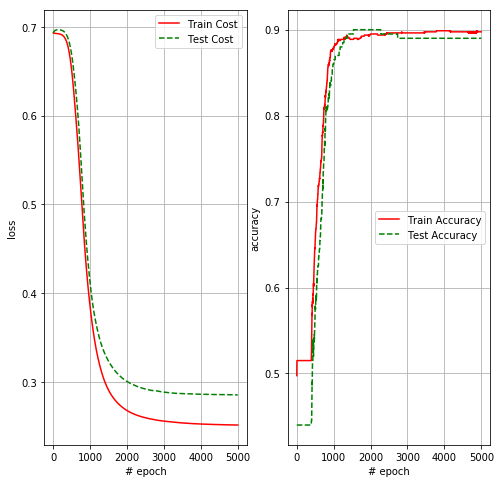

In [0]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(train_cost, 'r',label="Train Cost")
plt.plot(test_cost, 'g--',label="Test Cost")
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend( loc='upper right')

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r',label="Train Accuracy")
plt.plot(test_accuracy, 'g--',label="Test Accuracy")
plt.xlabel('# epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend( loc='center right')

## Confusion Matrix

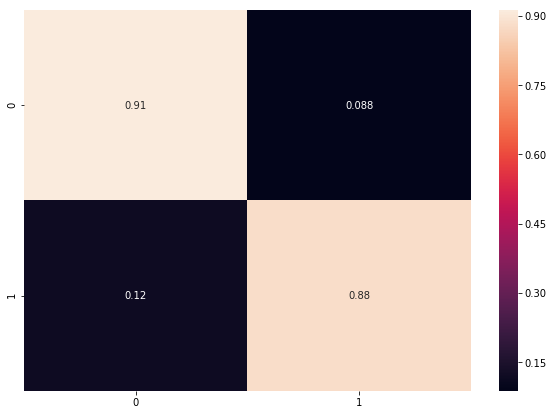

In [0]:

mat=confusion_matrix(y, pred.round())
mat=mat/mat.sum(axis=1)
df_cm = pd.DataFrame(mat)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Scatter Plot 

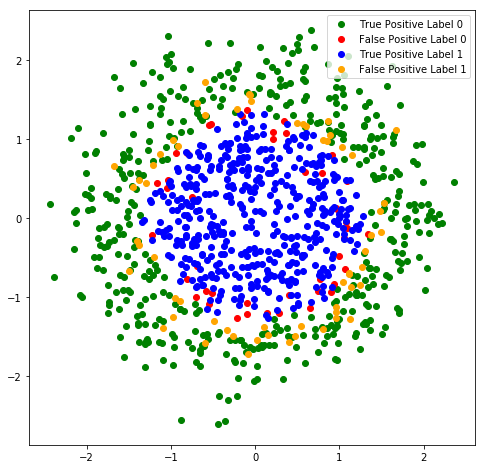

In [0]:
tp0=(pred==y) & (y==0)
fp0=(pred!=y) & (y==0)
tp1=(pred==y) & (y==1)
fp1=(pred!=y) & (y==1)


plt.figure(figsize=(8,8))
plt.scatter(X[tp0,0],X[tp0,1], c="green",label="True Positive Label 0")
plt.scatter(X[fp0,0],X[fp0,1], c="red",label="False Positive Label 0")
plt.scatter(X[tp1,0],X[tp1,1], c="blue",label="True Positive Label 1")
plt.scatter(X[fp1,0],X[fp1,1], c="orange",label="False Positive Label 1")


plt.legend( loc='upper right')

# Train The Model With Updating Parameter By Momentum 

In [0]:
train_cost, train_accuracy, test_cost, test_accuracy,pred=Train(Momentum=True)

epoch: 0 (cost: train 0.69 test 0.69) (accuracy: train 0.52 test 0.42)
epoch: 500 (cost: train 0.66 test 0.68) (accuracy: train 0.61 test 0.49)
epoch: 1000 (cost: train 0.41 test 0.45) (accuracy: train 0.86 test 0.83)
epoch: 1500 (cost: train 0.31 test 0.35) (accuracy: train 0.89 test 0.87)
epoch: 2000 (cost: train 0.28 test 0.31) (accuracy: train 0.89 test 0.89)
epoch: 2500 (cost: train 0.26 test 0.30) (accuracy: train 0.89 test 0.90)
epoch: 3000 (cost: train 0.26 test 0.29) (accuracy: train 0.89 test 0.90)
epoch: 3500 (cost: train 0.25 test 0.28) (accuracy: train 0.89 test 0.90)
epoch: 4000 (cost: train 0.25 test 0.28) (accuracy: train 0.89 test 0.90)
epoch: 4500 (cost: train 0.25 test 0.28) (accuracy: train 0.89 test 0.90)


## Display train/test loss and accuracy

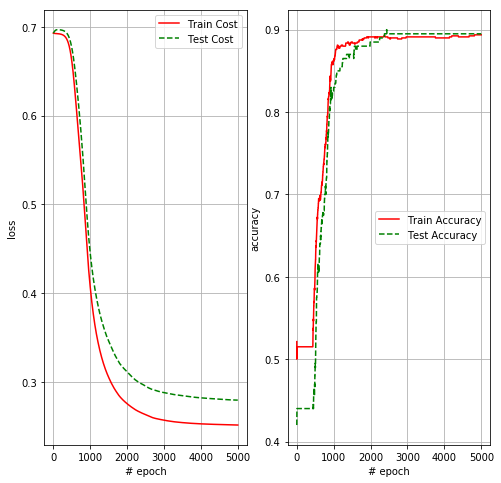

In [0]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(train_cost, 'r',label="Train Cost")
plt.plot(test_cost, 'g--',label="Test Cost")
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend( loc='upper right')

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r',label="Train Accuracy")
plt.plot(test_accuracy, 'g--',label="Test Accuracy")
plt.xlabel('# epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend( loc='center right')

## Confusion Matrix

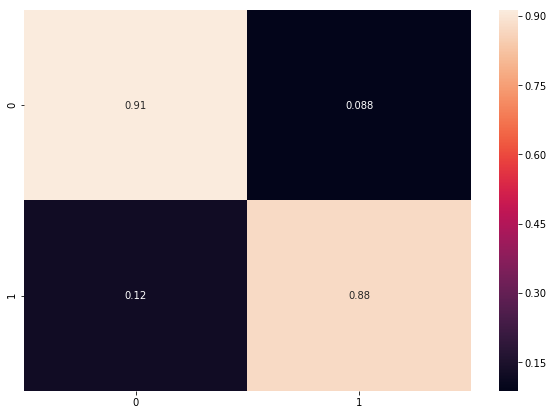

In [0]:

mat=confusion_matrix(y, pred.round())
mat=mat/mat.sum(axis=1)
df_cm = pd.DataFrame(mat)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Scatter Plot 

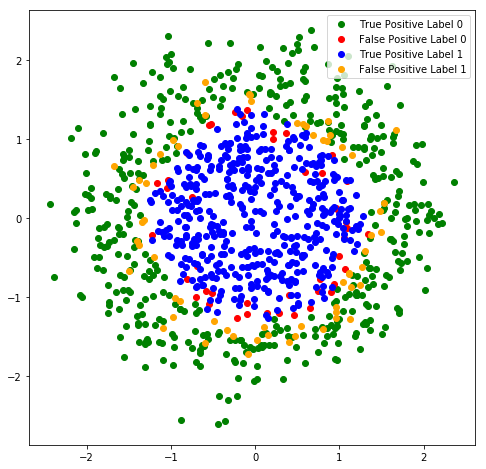

In [0]:
tp0=(pred==y) & (y==0)
fp0=(pred!=y) & (y==0)
tp1=(pred==y) & (y==1)
fp1=(pred!=y) & (y==1)


plt.figure(figsize=(8,8))
plt.scatter(X[tp0,0],X[tp0,1], c="green",label="True Positive Label 0")
plt.scatter(X[fp0,0],X[fp0,1], c="red",label="False Positive Label 0")
plt.scatter(X[tp1,0],X[tp1,1], c="blue",label="True Positive Label 1")
plt.scatter(X[fp1,0],X[fp1,1], c="orange",label="False Positive Label 1")


plt.legend( loc='upper right')